In [1]:
ROOT = '/content/drive/MyDrive/Colab Notebooks/ineuron live class working/Ineuron DL'

In [2]:
import os 


os.chdir(ROOT)

In [3]:
!ls

'11 09 .ipynb'	'Copy of 11 09 .ipynb'	 model	 plots	 test.txt


In [4]:
with open('test.txt','w') as f:
  f.writelines('hello colab')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib # FOR SAVING MY MODEL AS A BINARY FILE
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight") # THIS IS STYLE OF GRAPHS

In [6]:
np.random.randn(3)  

array([-0.36844007, -0.54496227, -0.32755462])

In [7]:
np.ones((3,1))

array([[1.],
       [1.],
       [1.]])

In [8]:
class perceptron:
  def __init__(self,eta,epochs): 
    self.weights = np.random.randn(3) * 1e-4 # the 3 here is the three weights as per our theory. w0,w1,w2
    print(f'Initial weights before training: \n{self.weights}') # f here is called the f string method
    self.eta = eta ## Learning rate
    self.epochs = epochs
    

  def activationfunction(self,inputs,weights):
    z = np.dot(inputs,weights) # z = W * X
    return np.where(z > 0, 1, 0) 


  def fit(self,X,y):
    self.X = X
    self.y = y 

    X_with_bias = np.c_[self.X, -np.ones((len(self.X),1))] 
    print(f'X with bias:\n {X_with_bias}') 

    for epoch in range(self.epochs):
      print("--"*10) 
      print(f'for epoch: {epoch}')
      print('--'*10)

      y_hat = self.activationfunction(X_with_bias,self.weights) # forward propogation
      print(f'predicted value after forward pass: \n{y_hat}')
      self.error = self.y - y_hat
      print(f'error: \n{self.error}')  
      self.weights =  self.weights + self.eta * np.dot(X_with_bias.T,self.error) # Backward propogation
      print(f'updated weights after epcohs: \n{epoch}/{self.epochs} :  \n{self.weights}') 
      print('######'*3)  

  def predict(self,X):
    X_with_bias = np.c_[X, -np.ones((len(X),1))] 
    return self.activationfunction(X_with_bias,self.weights)
      
  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f'total loss: {total_loss}')
    return total_loss


eta above is the learning rate.


The def activation function will take the inputs and weights. we are defining the inputs and weights here


def fit is the fit method we use in ML this is same. where we are giving the X and y to fit a model.


def predict is to predict the X 

In [9]:
def prepare_data(df):
  X  = df.drop('y',axis = 1)
  y = df['y']
  return X, y

**AND**

In [10]:
AND = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,0,0,1],
}

df = pd.DataFrame(AND)
df


,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [11]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model = perceptron(eta=ETA, epochs=EPOCHS)
model.fit(X, y)

_ = model.total_loss()

Initial weights before training: 
[-2.21604937e-05  3.93993405e-05  5.87024884e-05]
X with bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epcohs: 
0/10 :  
[ 0.29997784  0.3000394  -0.2999413 ]
##################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epcohs: 
1/10 :  
[-2.21604937e-05  3.93993405e-05  6.00058702e-01]
##################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epcohs: 
2/10 :  
[0.29997784 0.3000394  0.3000587 ]
##################
--------------------
for epoch: 3
--------------------
predic

In [12]:
model.predict(X)

array([0, 0, 0, 1])

In [13]:
inputs = np.array([[1,1],[0,1]])
model.predict(inputs)

array([1, 0])

In [14]:
def save_model(model,filename):
  model_dir = 'model'
  os.makedirs(model_dir,exist_ok=True) # ONLY CREATE IF MODEL DIRECTORY DOESNT EXIST
  filePath = os.path.join(model_dir,filename) # model/finalname
  joblib.dump(model,filePath)

In [15]:
save_model(model,'and.model')

In [16]:
loaded_model = joblib.load('model/and.model')

loaded_model.predict(inputs)

array([1, 0])

**OR TYPE** 

In [17]:
OR = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,1,1,1],
}

df = pd.DataFrame(OR)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [18]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_OR = perceptron(eta=ETA, epochs=EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()

Initial weights before training: 
[-4.03297026e-05 -5.74536129e-05 -1.35956533e-04]
X with bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epcohs: 
0/10 :  
[-4.03297026e-05 -5.74536129e-05  2.99864043e-01]
##################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epcohs: 
1/10 :  
[ 0.59995967  0.59994255 -0.60013596]
##################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epcohs: 
2/10 :  
[ 0.59995967  0.59994255 -0.30013596]
##################
--------------------
for epoch: 3
--------------------
pre

**XOR**

In [19]:
XOR = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,1,1,0],
}

df = pd.DataFrame(XOR)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [20]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_XOR = perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()

Initial weights before training: 
[-6.21773353e-05  5.27016988e-05  1.51786638e-05]
X with bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 1 0 0]
error: 
0    0
1    0
2    1
3    0
Name: y, dtype: int64
updated weights after epcohs: 
0/10 :  
[ 2.99937823e-01  5.27016988e-05 -2.99984821e-01]
##################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epcohs: 
1/10 :  
[-6.21773353e-05 -2.99947298e-01  3.00015179e-01]
##################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epcohs: 
2/10 :  
[ 2.99937823e-01  5.27016988e-05 -2.99984821e-01]
##################
--------------------
for epoch: 3


In the XOR how much ever epoch we try to run the total loss at the end will be there. Like the other models the prediction and actual error wont match. We can see how much the weights are getting updated there is error. We can see this error by plotting a graph.

In [21]:
def save_plot(df,file_name,model):
  def _create_base_plot(df):
    df.plot(kind='scatter',x='x1',y='x2',c='y',s=100,cmap='winter')
    plt.axhline(y=0,color='black',linestyle='--',linewidth=1)
    plt.axvline(x=0,color='black',linestyle='--',linewidth=1) 
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10,8)



  def _plot_decision_regions(X,y,classfier,resolution = 0.02):
    colors = ('red','blue','lightgreen','yellow','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    X = X.values #this is because we need the X values as array
    x1 = X[:,0] # Take all the rows but the first column only
    x2 = X[:,1] # Take all the rows but the 2nd column only
    x1_min,x1_max = x1.min()-1,x1.max() + 1
    x2_min,x2_max = x2.min()-1,x2.max() + 1

    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    
    print(xx1)
    print(xx1.ravel())
    
    Z = classfier.predict(np.array([xx1.ravel(),xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.2,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.xlim(xx2.min(),xx2.max()) 

    plt.plot()
    
  
  X,y = prepare_data(df)
  _create_base_plot(df)
  _plot_decision_regions(X,y,model)

  plot_dir = 'plots'
  os.makedirs(plot_dir,exist_ok=True)
  plotpath = os.path.join(plot_dir,file_name)
  plt.savefig(plotpath)


In [22]:
OR = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,1,1,1],
}

df = pd.DataFrame(OR)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [23]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_OR = perceptron(eta=ETA, epochs=EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()

Initial weights before training: 
[-1.13086529e-04 -1.06497677e-05  1.45782022e-04]
X with bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epcohs: 
0/10 :  
[ 0.59988691  0.59998935 -0.89985422]
##################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epcohs: 
1/10 :  
[ 0.59988691  0.59998935 -0.59985422]
##################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epcohs: 
2/10 :  
[ 0.59988691  0.59998935 -0.29985422]
##################
--------------------
for epoch: 3
--------------------
predicted value

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


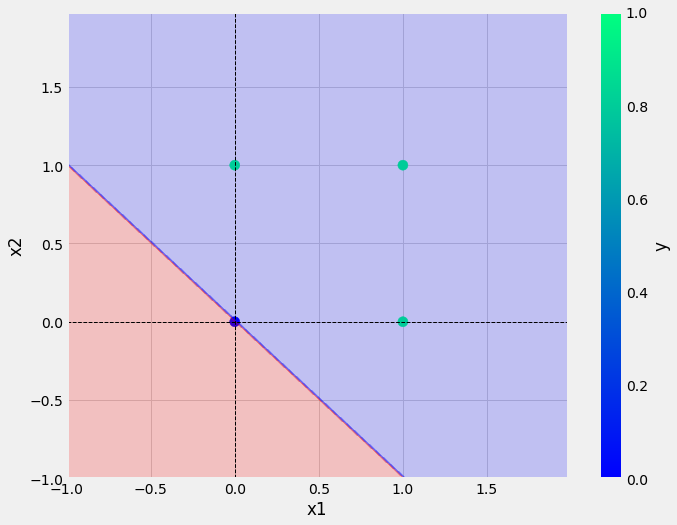

In [24]:
save_plot(df,'OR.png',model_OR)

In [25]:
AND = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,0,0,1],
}

df = pd.DataFrame(AND)
df


,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [26]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_AND = perceptron(eta=ETA, epochs=EPOCHS)
model_AND.fit(X, y)

_ = model_AND.total_loss()

Initial weights before training: 
[ 1.54147720e-04 -1.40069511e-04  1.50970966e-05]
X with bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 1 0]
error: 
0    0
1    0
2   -1
3    1
Name: y, dtype: int64
updated weights after epcohs: 
0/10 :  
[1.54147720e-04 2.99859930e-01 1.50970966e-05]
##################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epcohs: 
1/10 :  
[-2.99845852e-01 -1.40069511e-04  6.00015097e-01]
##################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epcohs: 
2/10 :  
[1.54147720e-04 2.99859930e-01 3.00015097e-01]
##################
--------------------
for epoch: 3
------

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


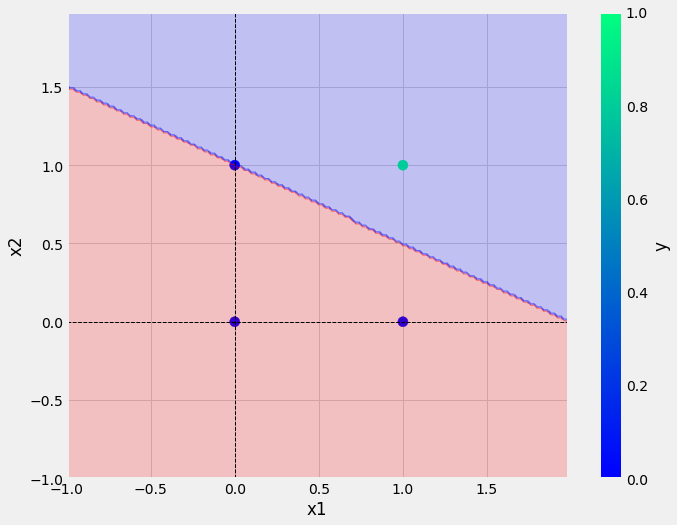

In [27]:
save_plot(df,'AND.png',model_AND)

In [28]:
XOR = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,1,1,0],
}

df = pd.DataFrame(XOR)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [29]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_XOR = perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()

Initial weights before training: 
[ 3.19897014e-05 -2.25717511e-05  5.44274945e-06]
X with bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 1 1]
error: 
0    0
1    1
2    0
3   -1
Name: y, dtype: int64
updated weights after epcohs: 
0/10 :  
[-2.99968010e-01 -2.25717511e-05  5.44274945e-06]
##################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epcohs: 
1/10 :  
[ 3.19897014e-05  2.99977428e-01 -5.99994557e-01]
##################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epcohs: 
2/10 :  
[-2.99968010e-01 -2.25717511e-05  5.44274945e-06]
##################
--------------------
for epoch: 3


[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


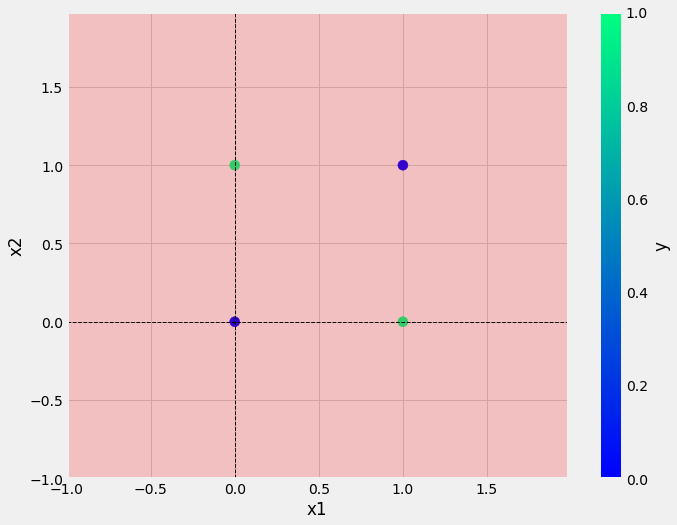

In [30]:
save_plot(df,'XOR.png',model_XOR)

We can see that in the XOR we cannot seperate the two data points with a line. This is where the perceptron is failing. In the AND and OR we can seperate the data points with a linear line but not in XOR. XOR is not linear. 

**NAND**

In [31]:
NAND = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[1,1,1,0],
}

df = pd.DataFrame(NAND)
df

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


In [32]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_NAND = perceptron(eta=ETA, epochs=EPOCHS)
model_NAND.fit(X, y)

_ = model_NAND.total_loss()

Initial weights before training: 
[ 9.42257051e-05 -5.17823120e-05  3.63495118e-05]
X with bias:
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 1 1]
error: 
0    1
1    1
2    0
3   -1
Name: y, dtype: int64
updated weights after epcohs: 
0/10 :  
[-2.99905774e-01 -5.17823120e-05 -2.99963650e-01]
##################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epcohs: 
1/10 :  
[-5.99905774e-01 -3.00051782e-01  3.63495118e-05]
##################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    1
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epcohs: 
2/10 :  
[-2.99905774e-01 -5.17823120e-05 -8.99963650e-01]
##################
--------------------
for epoch: 3


[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


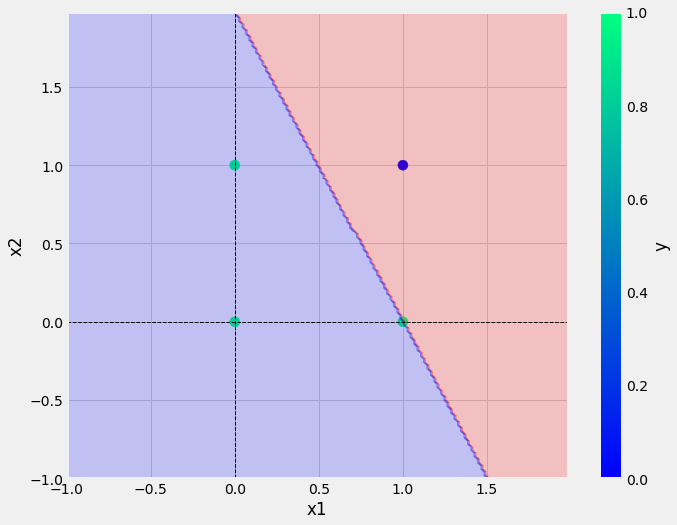

In [33]:
save_plot(df,'NAND.png',model_NAND)